#### 1. Implement fixed-point scaling of a line about its starting point.

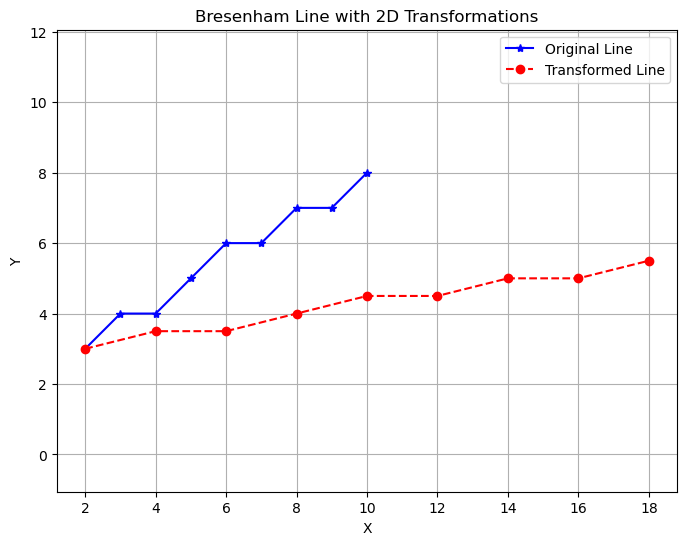

In [16]:
import numpy as np
import matplotlib.pyplot as plt
def bresenham_line(x0, y0, x1, y1):
    xes, yes = [], []
    dx =abs(x1-x0)
    dy = abs (y1- y0)
    sx = 1 if x1 >= x0 else -1
    sy = 1 if y1 >= y0 else-1
    x, y = x0, y0
    if dx >= dy:
        p = 2 * dy- dx
        for _ in range(dx + 1):
            xes.append(x)
            yes.append(y)
            x += sx
            if p >= 0:
                y += sy
                p += 2 * dy- 2 * dx
            else:
                p += 2 * dy
    else:
        p= 2*dx  - dy
        for _ in range (dy + 1):
            xes.append(x)
            yes.append(y)
            y += sy
            if p>= 0:
                x += sx
                p += 2 * dx- 2 * dy
            else:
                p += 2 * dx
    return np.array(xes), np.array(yes)
def apply_2d_transformation(x_coords, y_coords, transformation_matrix):
    points = np.vstack([x_coords, y_coords, np.ones_like(
    x_coords)])
    transformed_points = transformation_matrix @ points
    return transformed_points[0], transformed_points[1]
def plot_line_with_transformations(x0, y0, x1, y1):
    x_orig, y_orig = bresenham_line(x0, y0, x1, y1)
    xf, yf = x0, y0
    scaling_matrix = np.array([
    [2,0,    0],
    [0, 0.5, 0],
    [0,    0,1 ]
    ])
    T_to_origin = np.array([
    [1, 0,-xf],
    [0, 1,-yf],
    [0, 0, 1]
    ])
    T_back = np.array([
    [1, 0, xf],
    [0, 1, yf],
    [0, 0, 1]
    ])
    composite_matrix = T_back @ scaling_matrix @ T_to_origin
    
    x_transformed, y_transformed = apply_2d_transformation(x_orig, y_orig, composite_matrix)
    plt.figure(figsize=(8, 6))
    plt.plot(x_orig, y_orig, marker='*', color='blue', linestyle='-', label='Original Line')
    plt.plot(x_transformed, y_transformed, marker='o', color='red', linestyle='--', label='Transformed Line')
    plt.title("Scaling About Starting Point")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()
plot_line_with_transformations(2, 3, 10, 8) 

#### 2. Change the fixed point to the midpoint of the line and observe the difference.

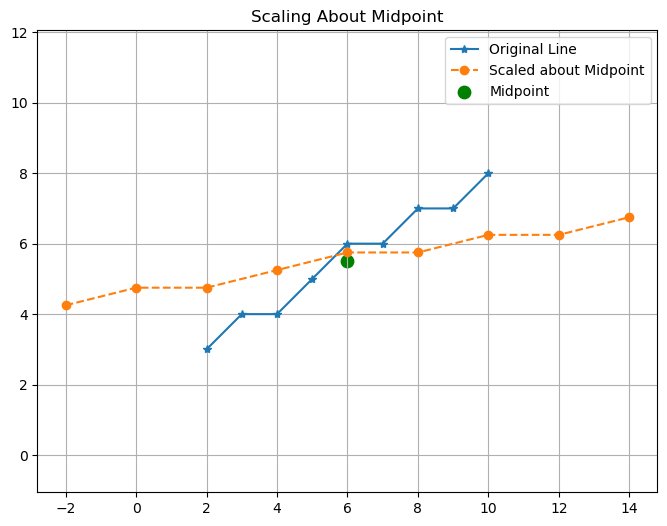

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def bresenham_line(x0, y0, x1, y1):
    xes, yes = [], []
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x1 >= x0 else -1
    sy = 1 if y1 >= y0 else -1
    x, y = x0, y0

    if dx >= dy:
        p = 2 * dy - dx
        for _ in range(dx + 1):
            xes.append(x)
            yes.append(y)
            x += sx
            if p >= 0:
                y += sy
                p += 2 * (dy - dx)
            else:
                p += 2 * dy
    else:
        p = 2 * dx - dy
        for _ in range(dy + 1):
            xes.append(x)
            yes.append(y)
            y += sy
            if p >= 0:
                x += sx
                p += 2 * (dx - dy)
            else:
                p += 2 * dx

    return np.array(xes), np.array(yes)

def apply_2d_transformation(x_coords, y_coords, transformation_matrix):
    points = np.vstack([x_coords, y_coords, np.ones_like(x_coords)])
    transformed_points = transformation_matrix @ points
    return transformed_points[0], transformed_points[1]
def plot_line_with_transformations(x0, y0, x1, y1):
    x_orig, y_orig = bresenham_line(x0, y0, x1, y1)
    xf = (x0 + x1) / 2
    yf = (y0 + y1) / 2
    sx, sy = 2, 0.5
    T_to_origin = np.array([
        [1, 0, -xf],
        [0, 1, -yf],
        [0, 0,  1]
    ])
    S = np.array([
        [sx, 0,  0],
        [0, sy,  0],
        [0,  0,  1]
    ])
    T_back = np.array([
        [1, 0, xf],
        [0, 1, yf],
        [0, 0, 1]
    ])
    composite_matrix = T_back @ S @ T_to_origin
    x_transformed, y_transformed = apply_2d_transformation(
        x_orig, y_orig, composite_matrix
    )
    plt.figure(figsize=(8, 6))
    plt.plot(x_orig, y_orig, '*-', label='Original Line')
    plt.plot(x_transformed, y_transformed, 'o--', label='Scaled about Midpoint')
    plt.scatter([xf], [yf], color='green', s=80, label='Midpoint')
    plt.title("Scaling About Midpoint")
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()
plot_line_with_transformations(2, 3, 10, 8)

#### 3. Implement pure rotation about the origin using the given rotation matrix.

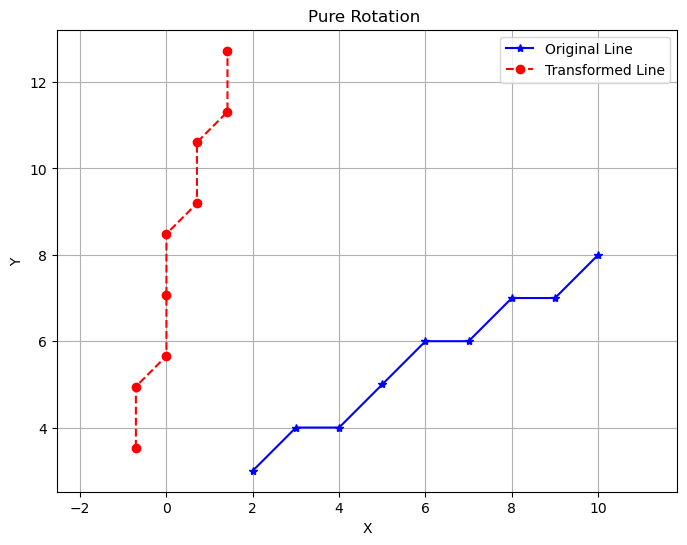

In [21]:
import numpy as np
import matplotlib.pyplot as plt
def bresenham_line(x0, y0, x1, y1):
    xes, yes = [], []
    dx =abs(x1-x0)
    dy = abs (y1- y0)
    sx = 1 if x1 >= x0 else -1
    sy = 1 if y1 >= y0 else-1
    x, y = x0, y0
    if dx >= dy:
        p = 2 * dy- dx
        for _ in range(dx + 1):
            xes.append(x)
            yes.append(y)
            x += sx
            if p >= 0:
                y += sy
                p += 2 * dy- 2 * dx
            else:
                p += 2 * dy
    else:
        p= 2*dx  - dy
        for _ in range (dy + 1):
            xes.append(x)
            yes.append(y)
            y += sy
            if p>= 0:
                x += sx
                p += 2 * dx- 2 * dy
            else:
                p += 2 * dx
    return np.array(xes), np.array(yes)
def apply_2d_transformation(x_coords, y_coords, transformation_matrix):
    points = np.vstack([x_coords, y_coords, np.ones_like(
    x_coords)])
    transformed_points = transformation_matrix @ points
    return transformed_points[0], transformed_points[1]
def plot_line_with_transformations(x0, y0, x1, y1):
    x_orig, y_orig = bresenham_line(x0, y0, x1, y1)
    xf, yf = x0, y0
    theta = np.pi / 4 
    rotation_matrix = np.array([
    [np.cos(theta),-np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0,0,1]
    ])
    composite_matrix = rotation_matrix 
    x_transformed, y_transformed = apply_2d_transformation(x_orig, y_orig, composite_matrix)
    plt.figure(figsize=(8, 6))
    plt.plot(x_orig, y_orig, marker='*', color='blue', linestyle='-', label='Original Line')
    plt.plot(x_transformed, y_transformed, marker='o', color='red', linestyle='--', label='Transformed Line')
    plt.title("Pure Rotation ")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()
plot_line_with_transformations(2, 3, 10, 8) 